# Causal programming demo

## Dependencies

In [26]:
(require '[acausal.core :refer [model model->svg query query->latex]]
         :reload)

## Model

$\text{malaria} = f(\epsilon_{\text{malaria}})$

$\text{flu} = f(\epsilon_{\text{flu}})$

$\text{fever} = f(\text{malaria}, \text{flu}, \epsilon_{\text{fever}})$

In [15]:
(def m
    "Malaria/flu model"
    (model
        {:malaria []
         :flu []
         :fever [:malaria :flu]}))

m

#acausal.core.Model{:vars #{:malaria :flu :fever}, :latents #{}, :parents {:malaria #{}, :flu #{}, :fever #{:malaria :flu}}, :children {:malaria #{:fever}, :flu #{:fever}, :fever #{}}}

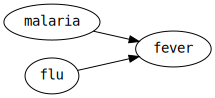

In [18]:
(model->svg m)

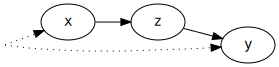

In [16]:
(def mediated
    (model
        {:x []
         :z [:x]
         :y [:z]}
        #{:x :y}))

(model->svg mediated)

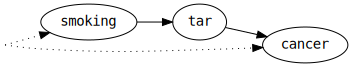

In [9]:
(def fisher
    "Smoking and cancer model"
    (model
        {:smoking []
         :tar [:smoking]
         :cancer [:tar]}
        #{:smoking :cancer}))

(model->svg fisher)

## Define a model

$$w = f_w(\epsilon_w)$$
$$x = f_x(\epsilon_x)$$
$$y = f_y(z, \epsilon_y)$$
$$z = f_z(w, x, \epsilon_z)$$

$$\epsilon_w \not ⫫ \epsilon_z$$
$$\epsilon_x \not ⫫ \epsilon_y$$

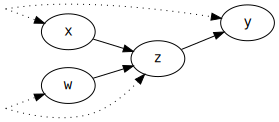

In [20]:
(def example
    (model
        {:w []
         :x []
         :y [:z]
         :z [:w :x]}
        #{:w :z}
        #{:x :y}))

(model->svg example)

In [27]:
(query->latex (query [:y] :do [:x]))